In [48]:
!pip install graphviz


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 KB 159.8 kB/s eta 0:00:00 MB/s eta 0:00:01


In [1]:
from graphviz import Digraph

# Crear el grafo dirigido
g = Digraph('Workflow', format='png', node_attr={'shape': 'box', 'style': 'rounded,filled', 'fillcolor': 'lightblue', 'fontsize': '17'}, edge_attr={'fontsize': '10'})

# Inicio
g.node('A', 'Start', fillcolor='lightgreen')
g.edge('A', 'A', label='<<b>GitHub repository for reproducibility</b>>', style='', color='black',fontsize='16', penwidth='2')
# Paso A: Feature Generation
g.node('B', '''Step A: Feature Generation
- /IMAGES/ with subfolders
- A1: Image Visualization
- A2: Extraction of 13 Features
- CSV generation in /FEATURE_RESULTS/
- Binary concatenation of CSV files''', fillcolor='#FF99FF')  # Nodo fusionado
g.edge('A', 'B')
g.edge('B', 'B', label='<<b>Binary_features_generation.ipynb</b>>', style='', color='black',fontsize='16',penwidth='2')

# Paso B: Optimization of QVM Model Parameters
g.node('H', '''Step B: Optimization of QVM Model Parameters
- Import libraries (qiskit, etc.)
- Define functions: ZZFeatureMap
- Load and normalize data
- Define circuit and cost function
- Optimization with COBYLA''', fillcolor='#FF99FF')  # Nodo fusionado
g.edge('B', 'H')
g.edge('H', 'H', label='<<b>FIT_DP_NODP_CIRCUIT.ipynb</b>>', style='', color='black',penwidth='2',fontsize='16')

# Paso C: Verification on Real Quantum Hardware or Simulation
g.node('R', '''Step C: Verification on Quantum Hardware/Simulation
- Environment setup
- Backend selection
- Load data and optimized parameters
- Transpile and execute circuits
- Results analysis and accuracy''', fillcolor='#FF99FF')  # Nodo fusionado
g.edge('H', 'R')
g.edge('R', 'R', label='<<b>QVM_verification_two_qubits.ipynb</b>>', color='black',fontsize='16',penwidth='2')

# Paso D: Execution of QKM Model
g.node('ZA', '''Step D: Execution of QKM Model
- Real quantum computer execution
- Estimation Quantum Kernel''', fillcolor='#FF99FF')  # Nodo fusionado
g.edge('R', 'ZA')
g.edge('ZA', 'ZA', label='<<b>Git_Hub.</b>>', style='', color='black',fontsize='16',penwidth='2')
# Final
g.node('END', 'End', fillcolor='lightgreen')
g.edge('ZA', 'END')

# Renderizar y mostrar el gráfico
g.render('workflow_diagram_compact', view=True)


'workflow_diagram_compact.png'

In [21]:
!pip install kroki

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 KB 310.7 kB/s eta 0:00:001m400.3 kB/s eta 0:00:01
  Created wheel for kroki: filename=kroki-0.1.2-py3-none-any.whl size=9066 sha256=e702d541090f136e332e8d8222e5d2de9e16c7a00f0de3031d89b8285dcb7e40
  Stored in directory: /home/josemiguel/.cache/pip/wheels/5e/31/e5/3be72bc7a0710c313efdfdf6b5616598741bd49ef9735b435b
Successfully built kroki


In [ ]:
#https://www.fisicacuantica.es/el-entrelazamiento-cuantico/

In [5]:
!pip install qiskit-ibm-runtime

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install qiskit


Defaulting to user installation because normal site-packages is not writeable


In [8]:
!pip install qiskit_algorithms

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install qiskit-aer

Defaulting to user installation because normal site-packages is not writeable


In [9]:
!pip install pylatexenc

Defaulting to user installation because normal site-packages is not writeable


In [7]:
from qiskit_aer import AerSimulator,Aer# ojo son distintos AerSimulator y Aer  AerSimulator es para entrar en estadisticas de IBM
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn import svm
import scipy


In [6]:
get_ipython().system('pip install pennylane')

Defaulting to user installation because normal site-packages is not writeable


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings("ignore")
# constants
n = 2
RANDOM_STATE = 42
LR = 1e-3
class_labels = ['0', '1']

def normalizeData(DATA_PATH = "./FEATURE_RESULTS/FEATURE_resultante_DP_NODP.csv"):
    """
    Normalizes the data
    """
    # Reads the data
    data = pd.read_csv(DATA_PATH)
    data = shuffle(data, random_state=RANDOM_STATE)
    X, Y = data[['area_pixels', ' mean_coords_x']].values, data[' class'].values

    # normalize the data
    scaler = MinMaxScaler(feature_range=(-0 * np.pi, 2 * np.pi))
    X = scaler.fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)
    return X_train, X_test, Y_train, Y_test


# In[5]:


import qiskit_algorithms
from qiskit_algorithms.optimizers import SPSA

from qiskit import QuantumCircuit

from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit.quantum_info import Statevector

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.utils import shuffle

import warnings
warnings.filterwarnings("ignore")

TRAIN_DATA, TEST_DATA, TRAIN_LABELS, TEST_LABELS = normalizeData()
# Replace all occurrences of 2 with 0
TRAIN_LABELS = np.where(TRAIN_LABELS == 2, 0, TRAIN_LABELS)
TEST_LABELS = np.where(TEST_LABELS == 2, 0, TEST_LABELS)
#print(TRAIN_DATA)


In [9]:
# OJO OJO OJO



from qiskit_aer import AerSimulator,Aer # ojo son distintos AerSimulator y Aer  AerSimulator es para entrar en estadisticas de IBM
#import pennylane as qml
#from pennylane import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn import svm
import scipy

In [10]:
TRAIN_LABELS


array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [11]:
TEST_LABELS

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [45]:
print(TEST_LABELS.shape)


(174,)


In [13]:
#Or, optionally use the save_account() method to save your credentials for easy access later on, before initializing the service.
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.



# Load saved credentials
QiskitRuntimeService.save_account(channel="ibm_quantum", token="......f8a50f104a0ea070104db339580e2611293f672831a5b......", overwrite=True, set_as_default=True)



#to run on a real quantum computer

service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)
backend.name

'ibm_brisbane'

In [14]:
#Or, optionally use the save_account() method to save your credentials for easy access later on, before initializing the service.
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="...........57f8a50f104a0ea070104db339...........", overwrite=True, set_as_default=True)

service = QiskitRuntimeService()
#backend = service.least_busy(operational=True, simulator=False)
#backend.name


from qiskit_ibm_runtime.fake_provider import FakeManilaV2,FakeBrisbane,FakeKyoto,FakeOsaka

# If you want simulation with updated errors from real computer

backend =FakeOsaka()


from qiskit.circuit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2



In [ ]:
from qiskit_ibm_runtime.fake_provider import FakeManilaV2,FakeBrisbane,FakeKyoto,FakeOsaka
backend =FakeOsaka()


from qiskit.circuit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2


In [15]:
backend.name

'fake_osaka'

In [17]:


#variable to store all transpiled circuits
counts= []
circuits_a = []
circuits_aa = []

#function to obtain the all transpiled circuit 
def VARIA_circuitos_DP_NODP(data, opt_var):
    """
    """
    #backend = Aer.get_backend('statevector_simulator')
    #feature_map = ZZFeatureMap_11_parametros_MODI(feature_dimension=2, reps=1, x=data,teta=opt_var)
    feature_map=ZZFeatureMap_10_parametros(feature_dimension=2, reps=1, theta_param=2, x=data, teta=opt_var)
    #backend = FakeOsaka()
    passmanager = generate_preset_pass_manager(optimization_level=3, backend=backend)
    
    transpiled_circuit = passmanager.run(feature_map)
    circuits_aa.append(transpiled_circuit)



    return 1


In [58]:



import numpy as np
from qiskit.circuit import ParameterVector
from qiskit import QuantumCircuit
import numpy as np

from qiskit import QuantumCircuit

"""

"""

x = ParameterVector('x', 2)
teta=ParameterVector('teta',10)
# define your parameters
def ZZFeatureMap_10_parametros(feature_dimension=2, reps=1, theta_param=np.pi/2, x=x, teta=teta):
    circuit = QuantumCircuit(feature_dimension)
#1.06324998,  0.49609634
    for i in range(reps):
        if i == 0:
            circuit.h(range(feature_dimension))

        for j in range(feature_dimension):
            circuit.p(theta_param * x[j] * 1, j)

        circuit.cx(0, 1)

        circuit.p(theta_param * (np.pi - x[0] *0.49609634) * (np.pi - x[1] *1.06324998), 1)

        circuit.cx(0, 1)

        # Ensure that the indices are within the range of feature_dimension
        if feature_dimension > 1:
            circuit.ry(teta[0], 0)
            circuit.ry(teta[1], 1)

        if feature_dimension > 1:
            circuit.cx(0, 1)
            circuit.ry(teta[2], 0)
            circuit.ry(teta[3], 1)
        if feature_dimension > 1:
            circuit.cx(0, 1)
            circuit.ry(teta[4], 0)
            circuit.ry(teta[5], 1)
            circuit.cx(0, 1)
        if feature_dimension > 1:
            circuit.cx(0, 1)
            circuit.ry(teta[6], 0)
            circuit.ry(teta[7], 1)
            circuit.cx(0, 1)
            circuit.ry(teta[8], 0)
            circuit.ry(teta[9], 1)
            circuit.cx(0, 1)
            circuit.measure_all()

    return circuit

feature_map = ZZFeatureMap_10_parametros(feature_dimension=2, reps=1, theta_param=2, x=x,teta=teta)


#   OPTIMUM VALUES FOR:

# DP_BREAK

opt_var=np.array([-0.45369495, 3.01307608, 0.34955593, -0.42861045, -3.038998 , -5.66827399, 1.69208433,
                  6.0084911 , 5.83775323, 2.25658061, 1.55460149])


# DP_NODP

opt_var=np.array([-1.36465941,  0.72901008,  0.46274449, -0.22550087,  0.71628267,
       -5.0369175 ,  0.25267942,  3.20192607,  2.22427876,  2.87675972])


counts= []
circuits_a = []
circuits_aa = []

# 136 circuits random circuits for this combination PD_NOPD

n_iterations =136

for i in range(n_iterations):
    # Get the ith element of training data
    #train_data_element = TRAIN_DATA[i]
    train_data_element =TRAIN_DATA[i]
    # Call the function with the current training data element and opt_var
    VARIA_circuitos_DP_NODP(train_data_element, opt_var)













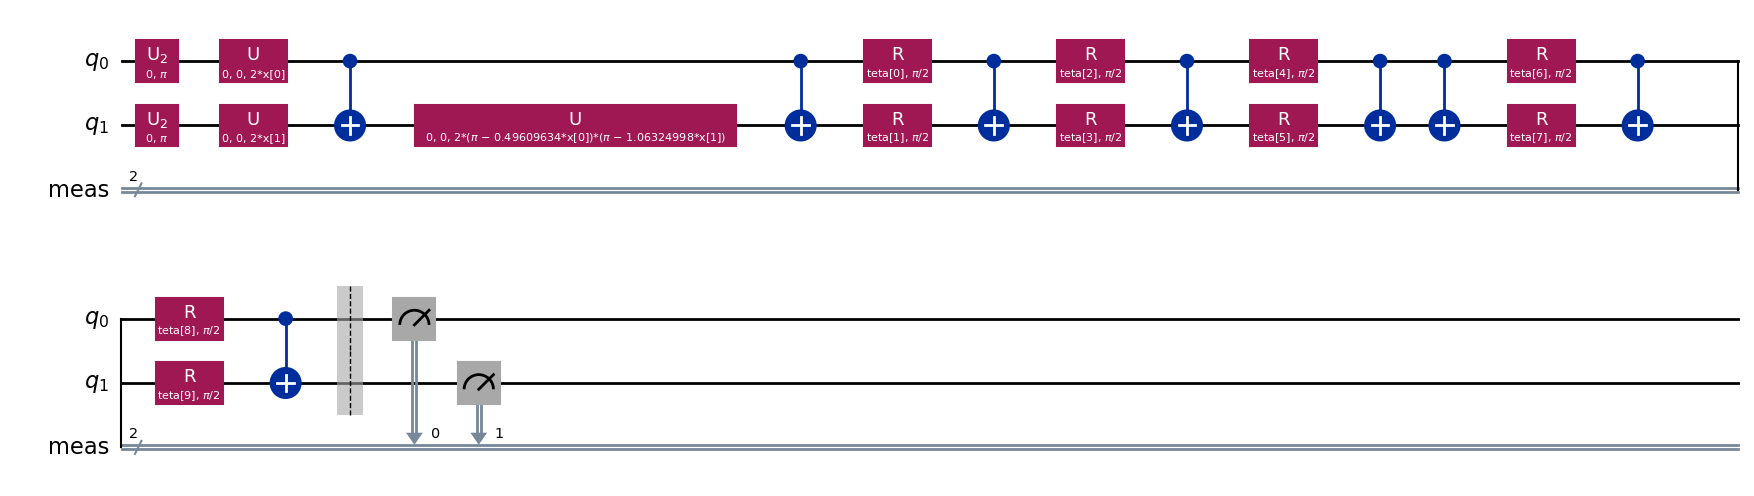

In [56]:
len(TEST_DATA)

feature_map = ZZFeatureMap_10_parametros(feature_dimension=2, reps=1, theta_param=2, x=x,teta=teta)
#print(feature_map)
feature_map.decompose().draw("mpl")

In [19]:
backend

In [47]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

# Assuming you have already set up your Qiskit service and backend

# Initialize the sampler and run the circuits

sampler = Sampler(backend)
job = sampler.run(circuits_aa)
result = job.result()

# Iterate over the results to print and save the counts
with open('./FEATURE_RESULTS/variacional_train_136_DP_NODP_IBM_Osaka_results_counts.txt', 'w') as f:
    for idx, pub_result in enumerate(result):
        counts = pub_result.data.meas.get_counts()
        f.write(f"Counts for pub {idx}: {counts}\n")
        print(f" > Counts for pub {idx}: {counts}")

 > Counts for pub 0: {'11': 416, '01': 160, '00': 347, '10': 101}
 > Counts for pub 1: {'10': 387, '01': 279, '00': 278, '11': 80}
 > Counts for pub 2: {'11': 560, '00': 389, '01': 60, '10': 15}
 > Counts for pub 3: {'11': 536, '01': 83, '00': 391, '10': 14}
 > Counts for pub 4: {'00': 409, '01': 67, '11': 537, '10': 11}
 > Counts for pub 5: {'10': 569, '00': 128, '01': 293, '11': 34}
 > Counts for pub 6: {'00': 239, '01': 130, '11': 194, '10': 461}
 > Counts for pub 7: {'01': 110, '00': 364, '11': 497, '10': 53}
 > Counts for pub 8: {'11': 520, '00': 416, '01': 66, '10': 22}
 > Counts for pub 9: {'01': 517, '10': 320, '00': 168, '11': 19}
 > Counts for pub 10: {'00': 297, '10': 566, '01': 99, '11': 62}
 > Counts for pub 11: {'00': 339, '11': 482, '01': 138, '10': 65}
 > Counts for pub 12: {'00': 387, '11': 559, '01': 55, '10': 23}
 > Counts for pub 13: {'10': 657, '00': 157, '01': 166, '11': 44}
 > Counts for pub 14: {'01': 321, '10': 566, '00': 109, '11': 28}
 > Counts for pub 15: {'

In [48]:


# Extract counts for '00' from each post and calculate the total sum of counts per post
# parity calculation is given for each Pub in "paridad"
counts_00 = []
paridad = []


counts_data = []
for idx, pub_result in enumerate(result):
        counts = pub_result.data.meas.get_counts()
        counts_data.append(counts)

        print(f" > Counts for pub {idx}: {counts}")

for counts in counts_data:
    total_counts = sum(counts.values())
    #print(total_counts)
    count_00 = counts.get('00', 0)
    count_01 = counts.get('01', 0)
    count_10 = counts.get('10', 0)
    count_11 = counts.get('11', 0)
    count_par = count_00 + count_11
    count_impar = count_01 + count_10


    if count_par > count_impar:
        pari = 1  # Paridad impar
    elif count_par < count_impar:
        pari = 0  # Paridad par
    else:
        if count_par == 0 or count_impar == 0:
            pari = None  # Indicar paridad inconclusa
        else:
            pari = 0  # Asignar paridad par arbitrariamente

    #count_00_pu = count_00 / total_counts if total_counts != 0 else 0  # Evitar división por cero
    paridad.append(pari)

 > Counts for pub 0: {'11': 416, '01': 160, '00': 347, '10': 101}
 > Counts for pub 1: {'10': 387, '01': 279, '00': 278, '11': 80}
 > Counts for pub 2: {'11': 560, '00': 389, '01': 60, '10': 15}
 > Counts for pub 3: {'11': 536, '01': 83, '00': 391, '10': 14}
 > Counts for pub 4: {'00': 409, '01': 67, '11': 537, '10': 11}
 > Counts for pub 5: {'10': 569, '00': 128, '01': 293, '11': 34}
 > Counts for pub 6: {'00': 239, '01': 130, '11': 194, '10': 461}
 > Counts for pub 7: {'01': 110, '00': 364, '11': 497, '10': 53}
 > Counts for pub 8: {'11': 520, '00': 416, '01': 66, '10': 22}
 > Counts for pub 9: {'01': 517, '10': 320, '00': 168, '11': 19}
 > Counts for pub 10: {'00': 297, '10': 566, '01': 99, '11': 62}
 > Counts for pub 11: {'00': 339, '11': 482, '01': 138, '10': 65}
 > Counts for pub 12: {'00': 387, '11': 559, '01': 55, '10': 23}
 > Counts for pub 13: {'10': 657, '00': 157, '01': 166, '11': 44}
 > Counts for pub 14: {'01': 321, '10': 566, '00': 109, '11': 28}
 > Counts for pub 15: {'

In [49]:
def parity(bitstring):
    """Returns 1 if parity of `bitstring` is even, otherwise 0."""
    hamming_weight = sum(int(k) for k in list(bitstring))
    return (hamming_weight+1) % 2
    
def label_probability(results):
    """Converts a dict of bitstrings and their counts,
    to parities and their counts"""
    shots = sum(results.values())
    probabilities = {0: 0, 1: 0}
    for bitstring, counts in results.items():
        label = parity(bitstring)
        probabilities[label] += counts / shots
    return probabilities

#Calculates the accuracy of predicting parities based on train labels.
def calculate_accuracy(train_labels, parity):
    """
    Calculates the accuracy of predicting parities based on train labels.

    Args:
        train_labels (list): A list of true parity labels (0 or 1).
        parity (list): A list of predicted parity values (0 or 1).

    Returns:
        float: The accuracy of parity predictions (0.0 to 1.0).
    """

    if len(train_labels) != len(parity):
        raise ValueError("train_labels and parity must have the same length")

    correct_predictions = sum(1 for true_label, predicted_label in zip(train_labels, parity) if true_label == predicted_label)

    accuracy = correct_predictions / len(train_labels)
    return accuracy

# Example usage (assuming TRAIN_LABELS and parity are populated correctly as lists)
#TRAIN_LABELS = [0, 1, 0, 1, 1, 0]  # Example true labels
#parity = [0, 1, 0, 0, 1, 0]  # Example predicted parity values

accuracy = calculate_accuracy(TRAIN_LABELS[0:136], paridad)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9118


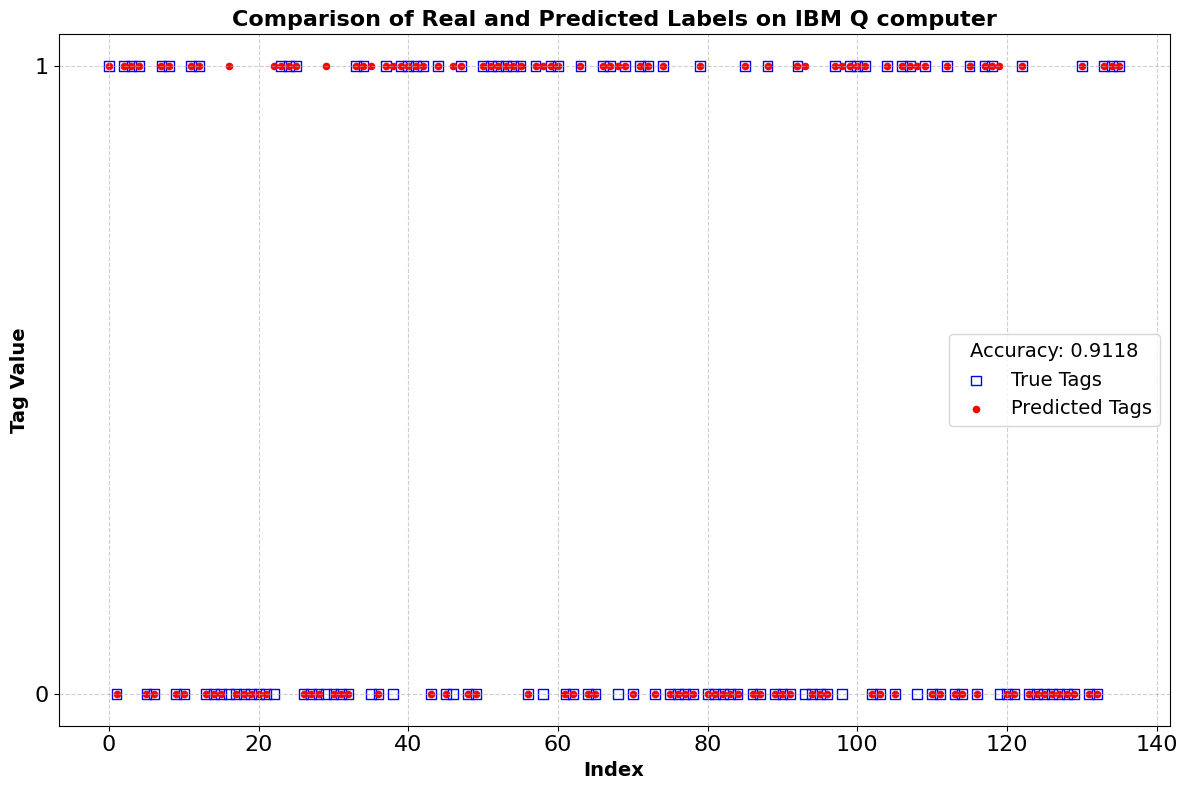

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
# Assuming TRAIN_LABELS and paridad are already defined
# For demonstration, let's create some dummy data:

# ... (Rest of your code to calculate 'paridad' and 'accuracy') ...

# Calculate accuracy (you should already have this function)
def calculate_accuracy(train_labels, parity):
    # ... (Your implementation of the function) ...
    if len(train_labels) != len(parity):
        raise ValueError("train_labels and parity must have the same length")

    correct_predictions = sum(1 for true_label, predicted_label in zip(train_labels, parity) if true_label == predicted_label)

    accuracy = correct_predictions / len(train_labels)
    return accuracy

accuracy = calculate_accuracy(TRAIN_LABELS[0:136], paridad)

# Verificar que ambas listas tengan la misma longitud
if len(TRAIN_LABELS[0:136]) != len(paridad):
    raise ValueError("TRAIN_LABELS and parity must have the same length")

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Configurar el gráfico
indices = np.arange(len(TRAIN_LABELS[0:136]))

# Graficar las etiquetas reales como puntos cuadrados sin relleno
ax.scatter(indices, TRAIN_LABELS[0:136], label='True Tags', edgecolors='b', facecolors='none', marker='s', s=50)

# Graficar las etiquetas predichas como puntos redondos más pequeños
ax.scatter(indices, paridad, label='Predicted Tags', color='r', marker='o', s=20)

# Configurar etiquetas y título
ax.set_xlabel('Index', fontsize=14, fontweight='bold')
ax.set_ylabel('Tag Value', fontsize=14, fontweight='bold')
ax.set_title('Comparison of Real and Predicted Labels on IBM Q computer', fontsize=16, fontweight='bold')

# Configurar la leyenda
# Modificar la leyenda para incluir la precisión
legend = ax.legend(fontsize=14, title=f"Accuracy: {accuracy:.4f}")  # Add accuracy to legend title
plt.setp(legend.get_title(), fontsize=14)  # Set legend title font size

# Ajustar los ticks del eje y para que sean solo 0 y 1
ax.set_yticks([0, 1])

# Mejorar la visualización de la cuadrícula
ax.grid(True, linestyle='--', alpha=0.6)

# Aumentar el tamaño de los números en los ejes
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Ajustar el espaciado de los elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
total_counts

4096

In [ ]:
counts_data = []
for idx, pub_result in enumerate(result):
        counts = pub_result.data.meas.get_counts()
        counts_data.append(counts)

        print(f" > Counts for pub {idx}: {counts}")

 > Counts for pub 0: {'00': 336, '10': 256, '01': 76, '11': 356}
 > Counts for pub 1: {'00': 252, '01': 155, '11': 364, '10': 253}
 > Counts for pub 2: {'00': 369, '11': 316, '10': 234, '01': 105}
 > Counts for pub 3: {'10': 294, '00': 342, '11': 325, '01': 63}
 > Counts for pub 4: {'10': 201, '11': 383, '00': 349, '01': 91}
 > Counts for pub 5: {'00': 263, '10': 199, '01': 320, '11': 242}
 > Counts for pub 6: {'11': 132, '10': 719, '00': 131, '01': 42}
 > Counts for pub 7: {'01': 341, '10': 487, '00': 131, '11': 65}
 > Counts for pub 8: {'00': 339, '10': 284, '01': 83, '11': 318}
 > Counts for pub 9: {'10': 282, '11': 117, '01': 564, '00': 61}
 > Counts for pub 10: {'00': 349, '11': 395, '10': 186, '01': 94}
 > Counts for pub 11: {'10': 495, '01': 319, '11': 125, '00': 85}
 > Counts for pub 12: {'10': 472, '00': 182, '01': 227, '11': 143}
 > Counts for pub 13: {'00': 508, '01': 215, '10': 270, '11': 31}
 > Counts for pub 14: {'11': 350, '10': 240, '01': 97, '00': 337}
 > Counts for pu

In [ ]:
import matplotlib.pyplot as plt

# Suponiendo que ya tienes los resultados en la variable `result`
counts_data = []
for idx, pub_result in enumerate(result):
    counts = pub_result.data.meas.get_counts()
    counts_data.append(counts)
    print(f" > Counts for pub {idx}: {counts}")

# Extraer los recuentos para '00' de cada publicación y calcular la suma total de recuentos por publicación
counts_00 = []
for counts in counts_data:
    total_counts = sum(counts.values())
    count_00 = counts.get('00', 0)
    count_00_pu = count_00 / total_counts if total_counts != 0 else 0  # Evitar división por cero
    counts_00.append(count_00_pu)
"""
# Imprimir los recuentos de '00' en p.u. para verificar
for idx, count in enumerate(counts_00):
    print(f"Counts of '00' in p.u. for pub {idx}: {count:.4f}")
"""

 > Counts for pub 0: {'00': 393, '11': 538, '01': 74, '10': 19}
 > Counts for pub 1: {'00': 388, '11': 563, '01': 53, '10': 20}
 > Counts for pub 2: {'01': 472, '00': 305, '10': 151, '11': 96}
 > Counts for pub 3: {'00': 399, '10': 303, '01': 280, '11': 42}
 > Counts for pub 4: {'11': 425, '01': 166, '00': 361, '10': 72}
 > Counts for pub 5: {'11': 534, '00': 410, '01': 57, '10': 23}
 > Counts for pub 6: {'00': 236, '11': 240, '10': 400, '01': 148}
 > Counts for pub 7: {'11': 447, '10': 126, '00': 311, '01': 140}
 > Counts for pub 8: {'01': 535, '00': 187, '10': 237, '11': 65}
 > Counts for pub 9: {'11': 378, '10': 377, '00': 191, '01': 78}
 > Counts for pub 10: {'00': 332, '10': 110, '01': 146, '11': 436}
 > Counts for pub 11: {'00': 342, '11': 452, '10': 70, '01': 160}
 > Counts for pub 12: {'01': 294, '11': 245, '10': 441, '00': 44}
 > Counts for pub 13: {'00': 399, '11': 537, '01': 71, '10': 17}
 > Counts for pub 14: {'10': 499, '00': 312, '11': 85, '01': 128}
 > Counts for pub 15:

'\n# Imprimir los recuentos de \'00\' en p.u. para verificar\nfor idx, count in enumerate(counts_00):\n    print(f"Counts of \'00\' in p.u. for pub {idx}: {count:.4f}")\n'